# <font color="red">Mineração de Dados Não Estruturados</font>
## <span style="color:red">Aula 01 - Nivelamento (Conceitos Básicos) - Parte 5</span>

#### Material de Apoio - Prática sobre Validação de Classificação e Agrupamento

# Importando Bibliotecas

In [ ]:
import numpy as np
import pandas as pd
import scipy
from scipy.spatial import distance_matrix
from scipy.cluster import hierarchy
import seaborn as sns
from scipy.spatial.distance import pdist
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn import datasets
from sklearn.metrics.cluster import adjusted_rand_score
from sklearn.cluster import KMeans

# CLASSIFICAÇÃO

## Accuracy

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
y_true = [0, 0, 0, 0, 1, 1, 1]
y_pred = [0, 0, 0, 0, 1, 1, 0]

acc = accuracy_score(y_true, y_pred)
print('accuracy = ',acc)

tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()

print('TP = ',tp)
print('FP = ',fp)
print('TN = ',tn)
print('FN = ',fn)

accuracy =  0.8571428571428571
TP =  2
FP =  0
TN =  4
FN =  1


In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
y_true = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1]
y_pred = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

acc = accuracy_score(y_true, y_pred)
print('accuracy = ',acc)

tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()

print('TP = ',tp)
print('FP = ',fp)
print('TN = ',tn)
print('FN = ',fn)

accuracy =  0.9142857142857143
TP =  0
FP =  0
TN =  32
FN =  3


## Precision

In [ ]:
from sklearn.metrics import precision_score

y_true = [1, 0, 1, 0, 0, 1, 1]
y_pred = [0, 0, 1, 0, 1, 0, 1]

p = precision_score(y_true, y_pred)
print('precision = ',p)

tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
print('TP = ',tp)
print('FP = ',fp)
print('TN = ',tn)
print('FN = ',fn)


precision =  0.6666666666666666
TP =  2
FP =  1
TN =  2
FN =  2


In [ ]:
from sklearn.metrics import precision_score
y_true = [0, 1, 1, 1, 1, 1, 1]
y_pred = [0, 0, 0, 0, 0, 0, 1]

p = precision_score(y_true, y_pred)
print('precision = ',p)

tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
print('TP = ',tp)
print('FP = ',fp)
print('TN = ',tn)
print('FN = ',fn)

## Recall

In [ ]:
from sklearn.metrics import recall_score
y_true = [0, 1, 0, 0, 1, 1, 1]
y_pred = [0, 1, 1, 0, 1, 1, 1]

r = recall_score(y_true, y_pred)

print('recall = ',r)

tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
print('TP = ',tp)
print('FP = ',fp)
print('TN = ',tn)
print('FN = ',fn)

recall =  1.0
TP =  4
FP =  1
TN =  2
FN =  0


In [ ]:
from sklearn.metrics import recall_score
y_true = [0, 0, 0, 0, 1, 1, 1]
y_pred = [1, 1, 1, 1, 1, 1, 1]

r = recall_score(y_true, y_pred)

print('recall = ',r)

tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
print('TP = ',tp)
print('FP = ',fp)
print('TN = ',tn)
print('FN = ',fn)

In [ ]:

confusion_matrix(y_true, y_pred)

## F1-Score

In [ ]:
from sklearn.metrics import f1_score
y_true = [0, 0, 0, 0, 1, 1, 1]
y_pred = [0, 0, 0, 0, 1, 1, 1]

f1_score(y_true, y_pred)

1.0

In [ ]:
from sklearn.metrics import f1_score
y_true = [0, 0, 0, 0, 1, 1, 1]
y_pred = [1, 1, 1, 1, 1, 1, 1]

f1_score(y_true, y_pred)

0.6

## F1-Score por classe e dados desbalanceados

In [ ]:
from sklearn.metrics import f1_score
y_true = [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1]
y_pred = [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

f1_score(y_true, y_pred, average='micro')

0.7272727272727273

In [ ]:
from sklearn.metrics import f1_score
y_true = [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1]
y_pred = [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

f1_score(y_true, y_pred, average='macro')

0.4210526315789474

## ROC e AUC

In [ ]:
import numpy as np
from sklearn.metrics import roc_auc_score
y_true = [0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1]
y_pred = [1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1]
roc_auc_score(y_true, y_pred)

In [ ]:
# https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html

import numpy as np
import matplotlib.pyplot as plt
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from sklearn.metrics import roc_auc_score

# Import some data to play with
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Binarize the output
y = label_binarize(y, classes=[0, 1, 2])
n_classes = y.shape[1]

# Add noisy features to make the problem harder
random_state = np.random.RandomState(0)
n_samples, n_features = X.shape
X = np.c_[X, random_state.randn(n_samples, 200 * n_features)]

# shuffle and split training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.5,
                                                    random_state=0)

# Learn to predict each class against the other
classifier = OneVsRestClassifier(svm.SVC(kernel='linear', probability=True,
                                 random_state=random_state))
y_score = classifier.fit(X_train, y_train).decision_function(X_test)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])


classe = 2
plt.figure()
lw = 2
plt.plot(fpr[classe], tpr[classe], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[classe])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

## Vários algoritmos e vários problemas de classificação

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


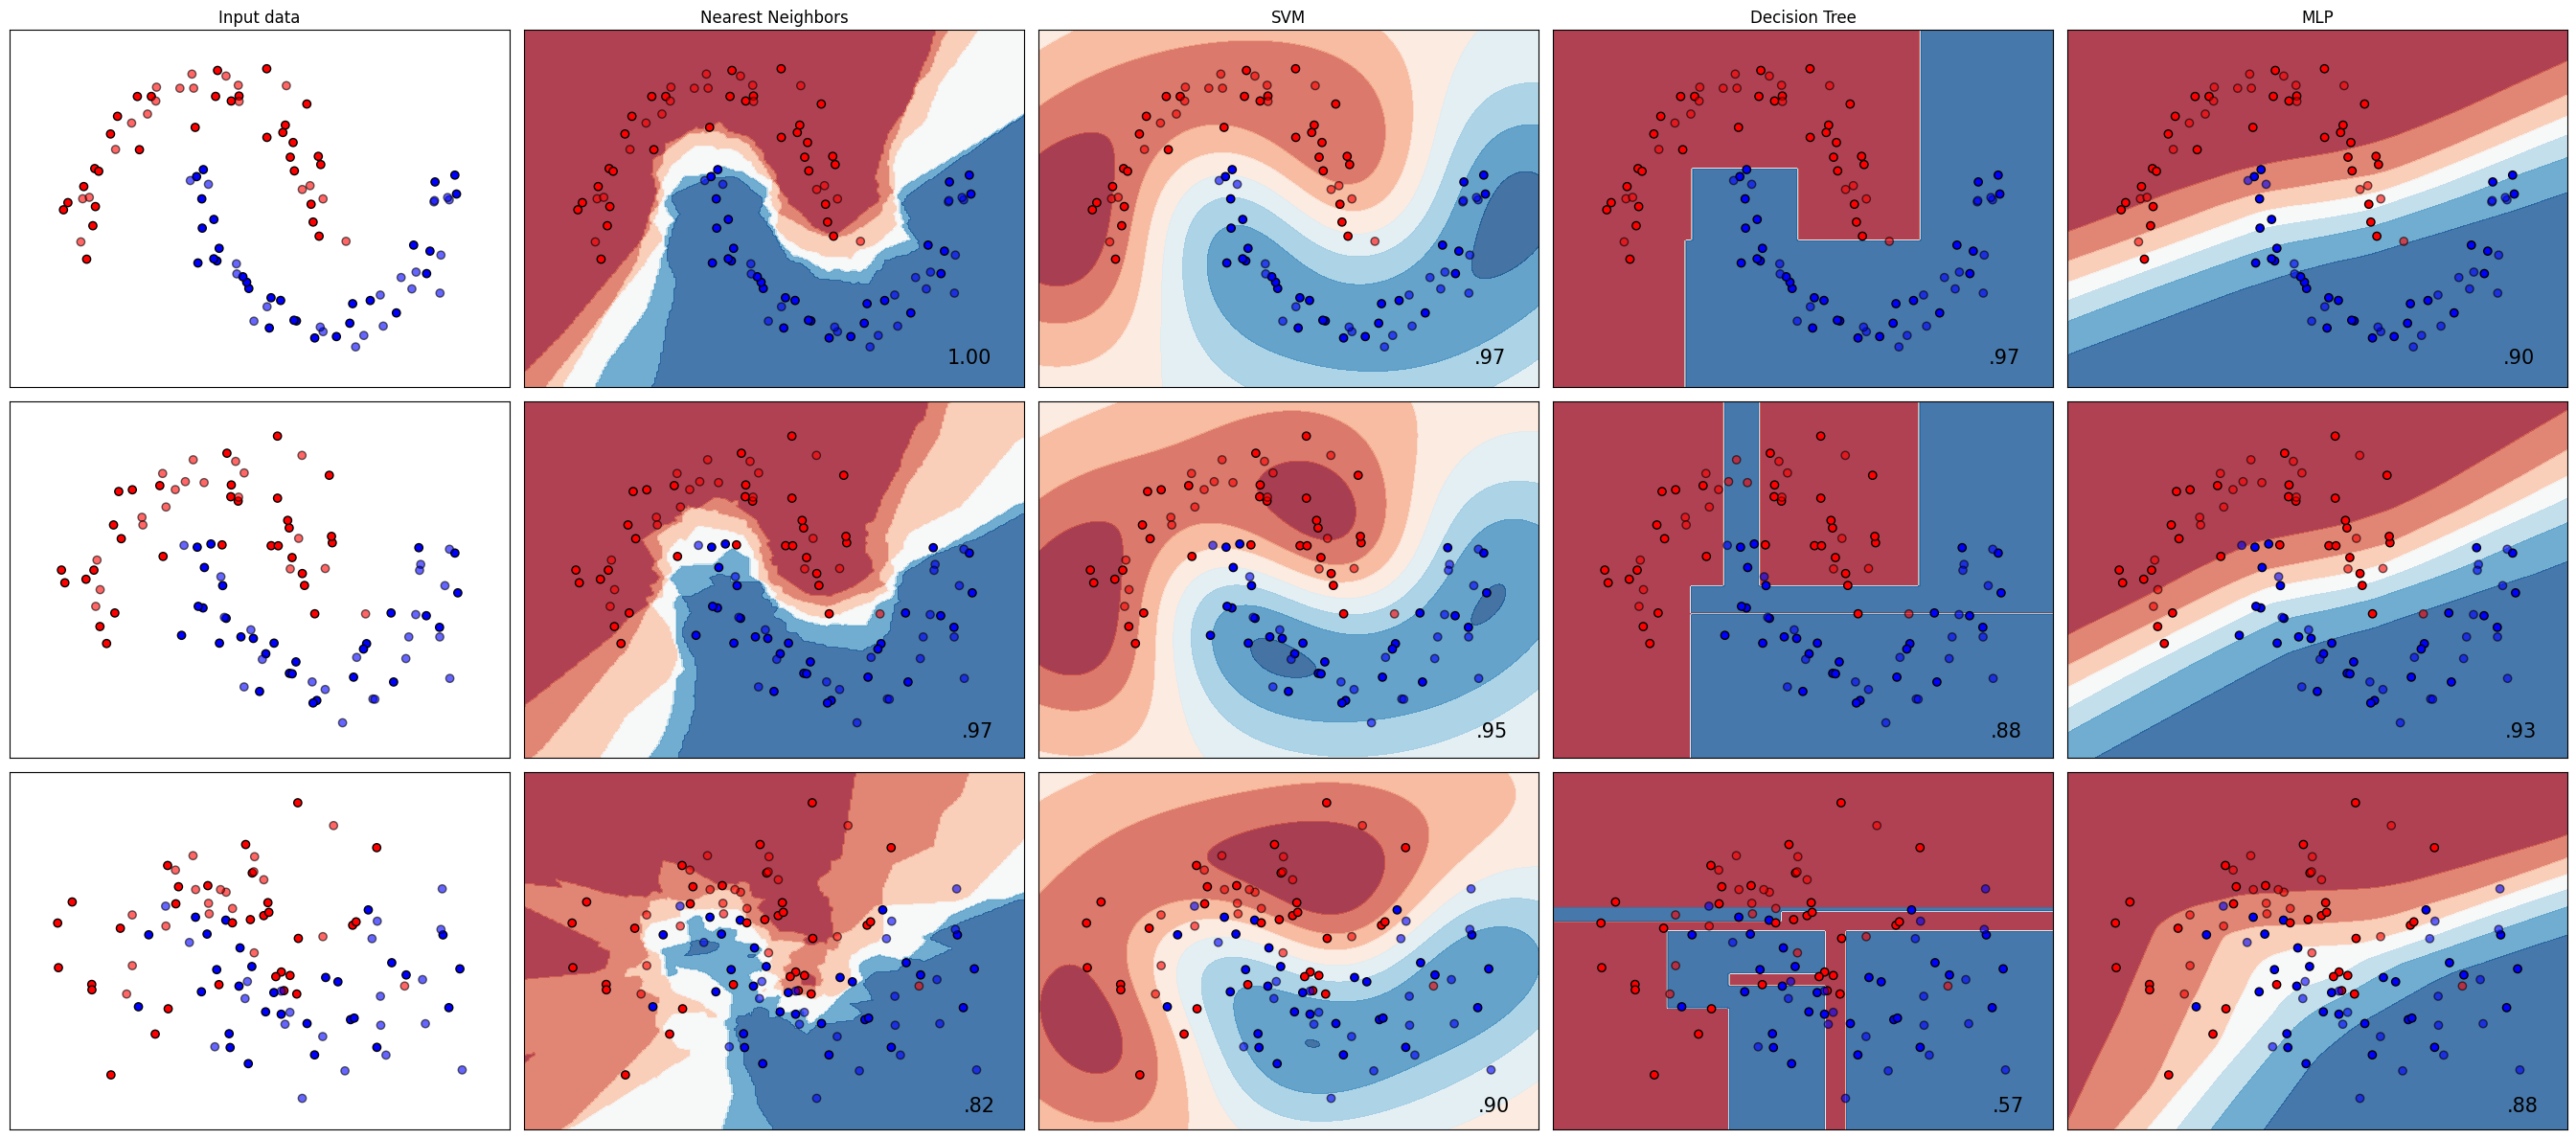

In [ ]:
# https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

h = .02  # step size in the mesh

names = ["Nearest Neighbors", "SVM", "Decision Tree", "MLP"]

classifiers = [
    KNeighborsClassifier(),
    SVC(),
    DecisionTreeClassifier(),
    MLPClassifier()]

X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                           random_state=1, n_clusters_per_class=1)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)

datasets = [make_moons(noise=0.1, random_state=0),
            make_moons(noise=0.2, random_state=0),
            make_moons(noise=0.5, random_state=0)]

figure = plt.figure(figsize=(27, 12))
i = 1

L_dataset = []
L_classifier = []
L_accuracy = []
L_precision = []
L_recall = []
L_f1 = []
L_f1_macro = []
L_roc_auc = []

# iterate over datasets
for ds_cnt, ds in enumerate(datasets):
    # preprocess dataset, split into training and test part
    X, y = ds
    X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = \
        train_test_split(X, y, test_size=.4, random_state=42)

    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    if ds_cnt == 0:
        ax.set_title("Input data")
    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
               edgecolors='k')
    # Plot the testing points
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6,
               edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1

    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)
        y_pred = clf.predict(X_test)

        L_dataset.append(ds_cnt)
        L_classifier.append(name)
        L_accuracy.append(accuracy_score(y_test,y_pred))
        L_precision.append(precision_score(y_test,y_pred))
        L_recall.append(recall_score(y_test,y_pred))
        L_f1.append(f1_score(y_test,y_pred,average="micro"))
        L_f1_macro.append(f1_score(y_test,y_pred,average="macro"))

        # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, x_max]x[y_min, y_max].
        if hasattr(clf, "decision_function"):
            Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        else:
            Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

        # Plot the training points
        ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
                   edgecolors='k')
        # Plot the testing points
        ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
                   edgecolors='k', alpha=0.6)

        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        if ds_cnt == 0:
            ax.set_title(name)
        ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
                size=15, horizontalalignment='right')
        i += 1

plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd

df = pd.DataFrame()
df['dataset'] = L_dataset
df['classifier'] = L_classifier
df['accuracy'] = L_accuracy
df['precision'] = L_precision
df['recall'] = L_recall
df['f1'] = L_f1
df['f1-macro'] = L_f1_macro


df

# CLUSTERING

# Validação por Inspeção Visual

## Exemplo 1

In [ ]:
import pandas as pd
from sklearn.datasets import make_blobs

dados1, y = make_blobs(n_samples=100,
                  n_features=2,
                  centers=3,
                  shuffle=True,
                  random_state=1)  # For reproducibility

In [ ]:
dados1 = pd.DataFrame(dados1)
dados1.columns = ['x','y']
dados1.head(10)

,x,y
0,-0.794152,2.104951
1,-9.151552,-4.812864
2,-11.441826,-4.457814
3,-9.767618,-3.191337
4,-4.536556,-8.401863
5,-6.263021,-8.106661
6,-6.384812,-8.473030
7,-9.204906,-4.576879
8,-2.760179,5.551214
9,-1.171042,4.330918


<Axes: xlabel='x', ylabel='y'>

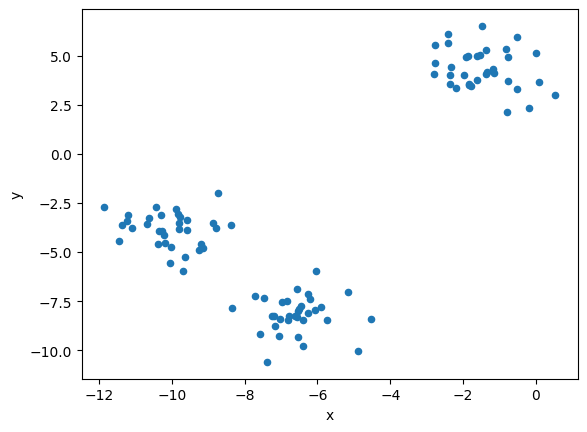

In [ ]:
dados1.plot(kind='scatter',x='x',y='y')

In [ ]:
import numpy as np
def calcular_matriz_dissimilaridade(dados):
  M = np.zeros((len(dados),len(dados)))
  for i,row_i in dados.iterrows(): # para cada objeto i
      features_i = np.array(row_i) # atributos do objeto i
      for j,row_j in dados.iterrows(): # para cada objeto j
          features_j = np.array(row_j) # atributos do objeto j
          # calcula distância euclidiana
          euc = scipy.spatial.distance.euclidean(features_i, features_j)
          # armazena na posição M[i,j]
          M[i,j] = euc
  return M

In [ ]:
M = calcular_matriz_dissimilaridade(dados1)

/usr/local/lib/python3.10/dist-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
/usr/local/lib/python3.10/dist-packages/seaborn/matrix.py:530: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage = hierarchy.linkage(self.array, method=self.method,
/usr/local/lib/python3.10/dist-packages/seaborn/matrix.py:560: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)
/usr/local/lib/python3.10/dist-packages/seaborn/matrix.py:530: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  linkage = hierarchy.linkage(self.array, method=self.method,


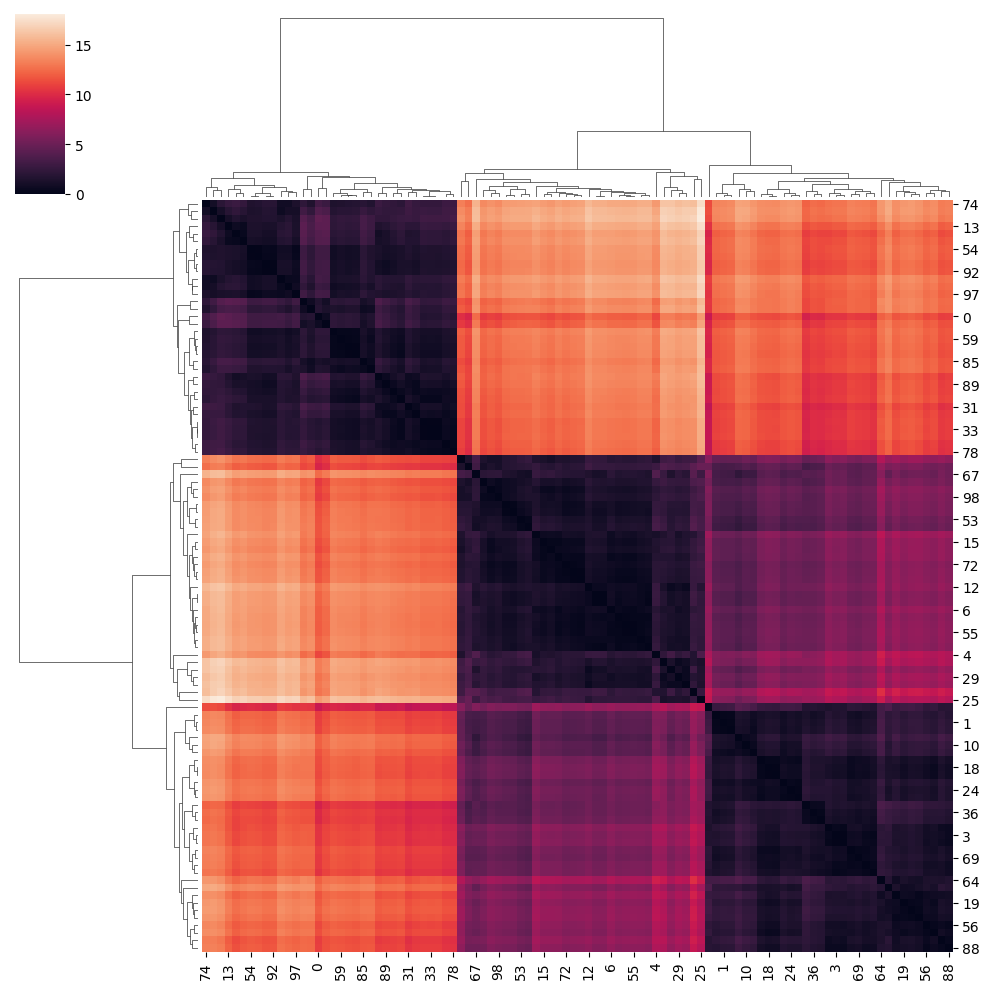

In [ ]:
sns.clustermap(M)  # average-link com distância euclidiana

## Exemplo 2

Vamos gerar um conjunto de dados aleatórios e analisar o agrupamento via inspeção visual.

In [ ]:
dados_random = pd.DataFrame(np.random.rand(300,2))
dados_random

In [ ]:
dados_random.plot(kind='scatter',x=0,y=1)

In [ ]:
M = calcular_matriz_dissimilaridade(dados_random)
sns.clustermap(M)  # average-link com distância euclidiana

# Índice de Validade Relativa (Silhueta)

## Exemplo 1

<Axes: xlabel='x', ylabel='y'>

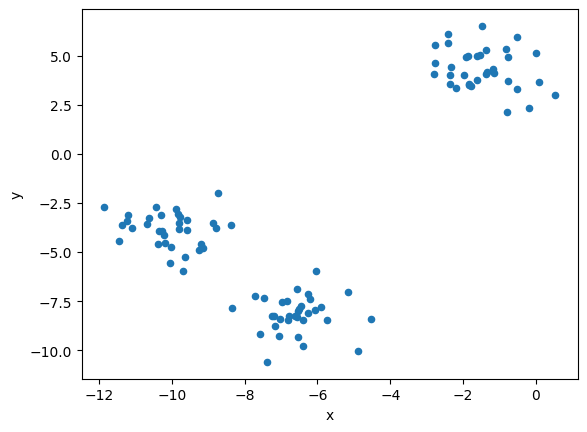

In [ ]:
dados1.plot(kind='scatter',x='x',y='y')

In [ ]:
dados1

,x,y
0,-0.794152,2.104951
1,-9.151552,-4.812864
2,-11.441826,-4.457814
3,-9.767618,-3.191337
4,-4.536556,-8.401863
...,...,...
95,-6.026058,-5.966248
96,-7.047473,-9.275247
97,-1.373973,5.291631
98,-6.253931,-7.108786


In [ ]:
kmeans = KMeans(n_clusters=3,n_init=10,init='random',max_iter=300)
kmeans.fit(dados1) # agrupando

KMeans(init='random', n_clusters=3, n_init=10)

In [ ]:
dados1['cluster'] = kmeans.labels_

In [ ]:
dados1

,x,y,cluster
0,-0.794152,2.104951,2
1,-9.151552,-4.812864,1
2,-11.441826,-4.457814,1
3,-9.767618,-3.191337,1
4,-4.536556,-8.401863,0
...,...,...,...
95,-6.026058,-5.966248,0
96,-7.047473,-9.275247,0
97,-1.373973,5.291631,2
98,-6.253931,-7.108786,0


Calculando o índice de silhueta para cada objeto

In [ ]:
dados1['silhueta'] = silhouette_samples(dados1, kmeans.labels_)
dados1

,x,y,cluster,silhueta
0,-0.794152,2.104951,2,0.768096
1,-9.151552,-4.812864,1,0.629061
2,-11.441826,-4.457814,1,0.704668
3,-9.767618,-3.191337,1,0.789916
4,-4.536556,-8.401863,0,0.676323
...,...,...,...,...
95,-6.026058,-5.966248,0,0.476188
96,-7.047473,-9.275247,0,0.749881
97,-1.373973,5.291631,2,0.881429
98,-6.253931,-7.108786,0,0.712596


In [ ]:
# calculando o valor de silhueta para todo o agrupamento
dados1.silhueta.mean()

0.7731206054937501

## Identificando k conforme silhueta

Automatically created module for IPython interactive environment
For n_clusters = 2 The average silhouette_score is : 0.7049787496083262


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters = 3 The average silhouette_score is : 0.5882004012129721
For n_clusters = 4 The average silhouette_score is : 0.6505186632729437


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters = 5 The average silhouette_score is : 0.5804620679044765


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


For n_clusters = 6 The average silhouette_score is : 0.4966479110816958


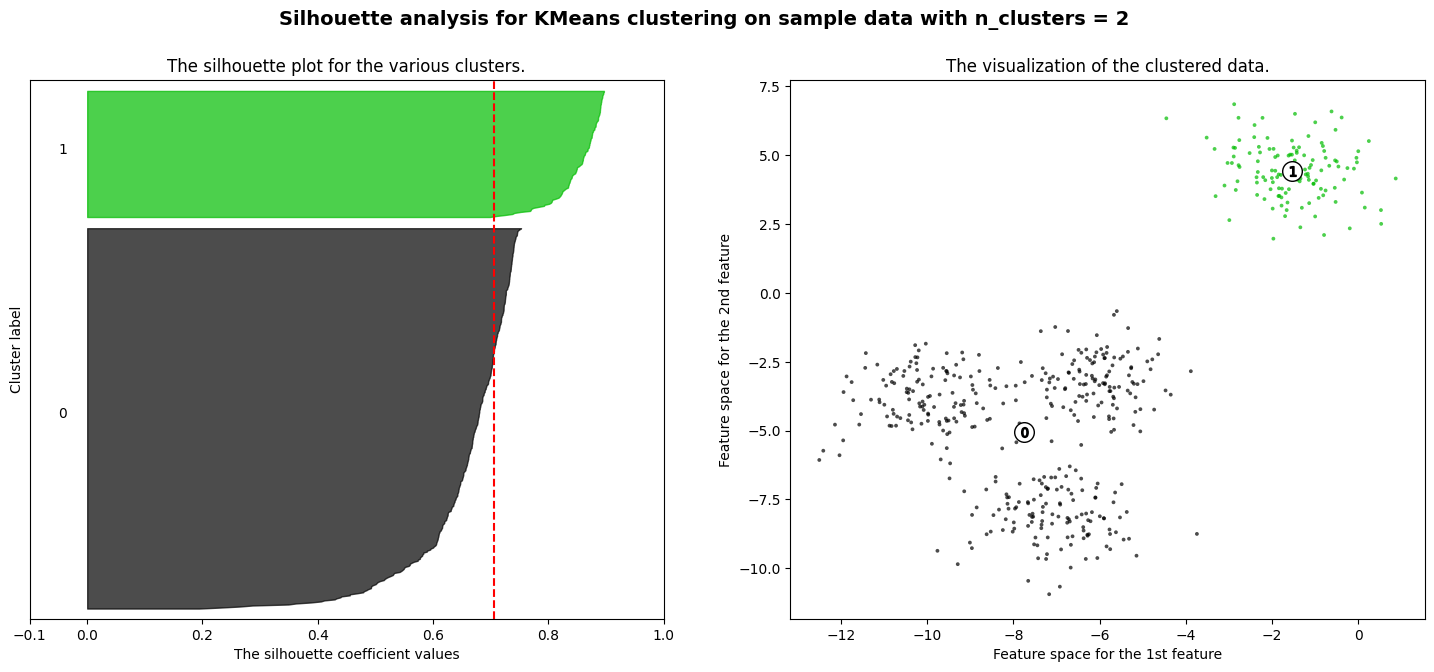

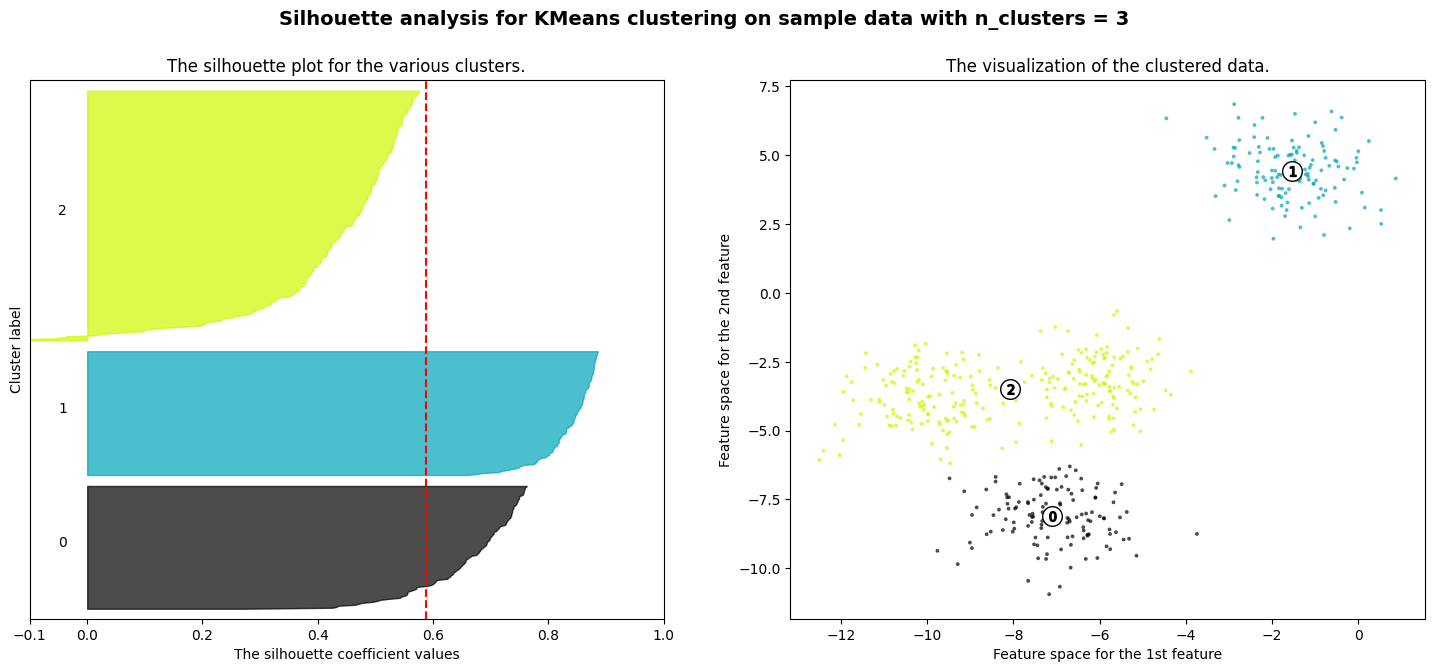

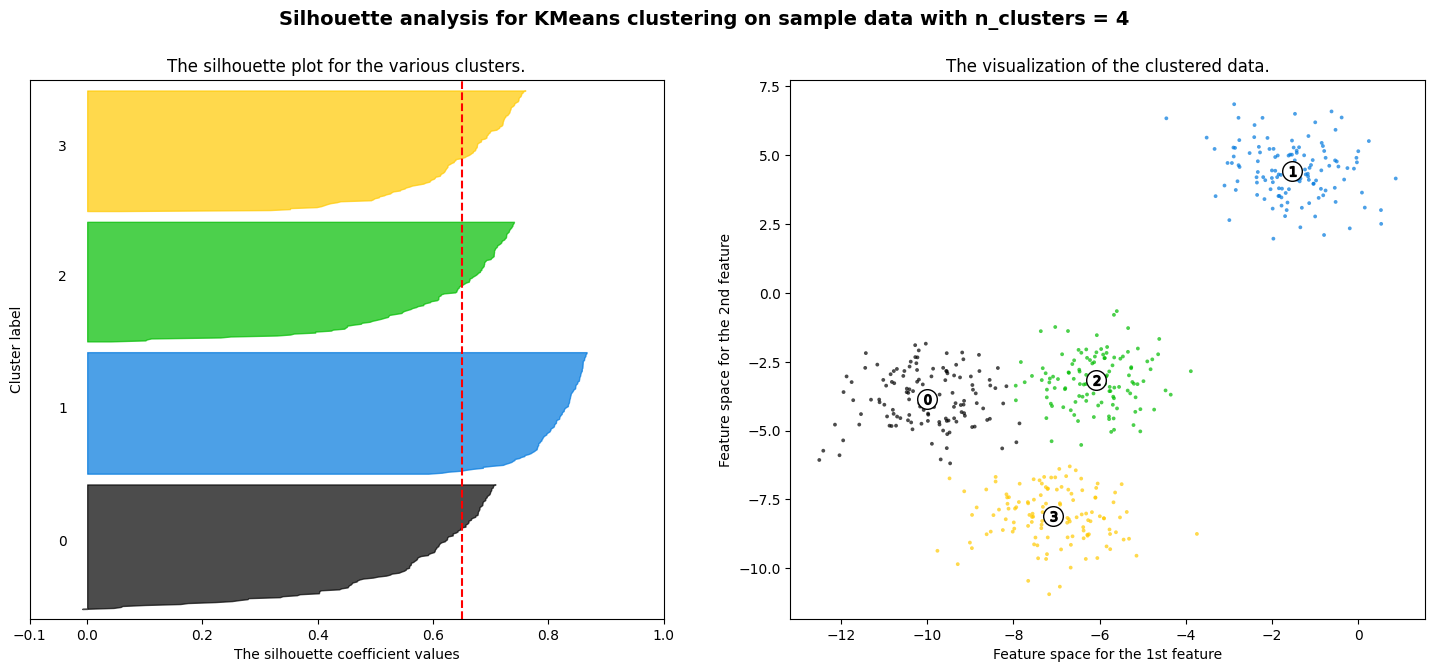

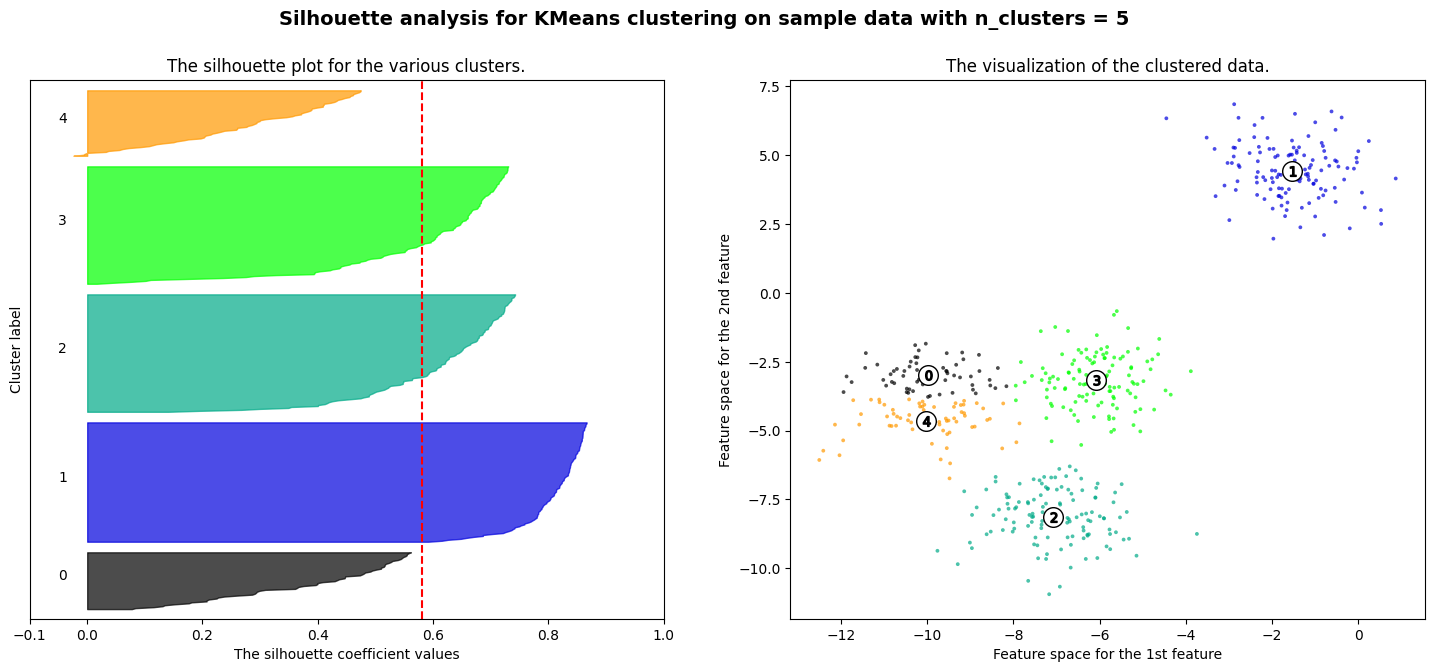

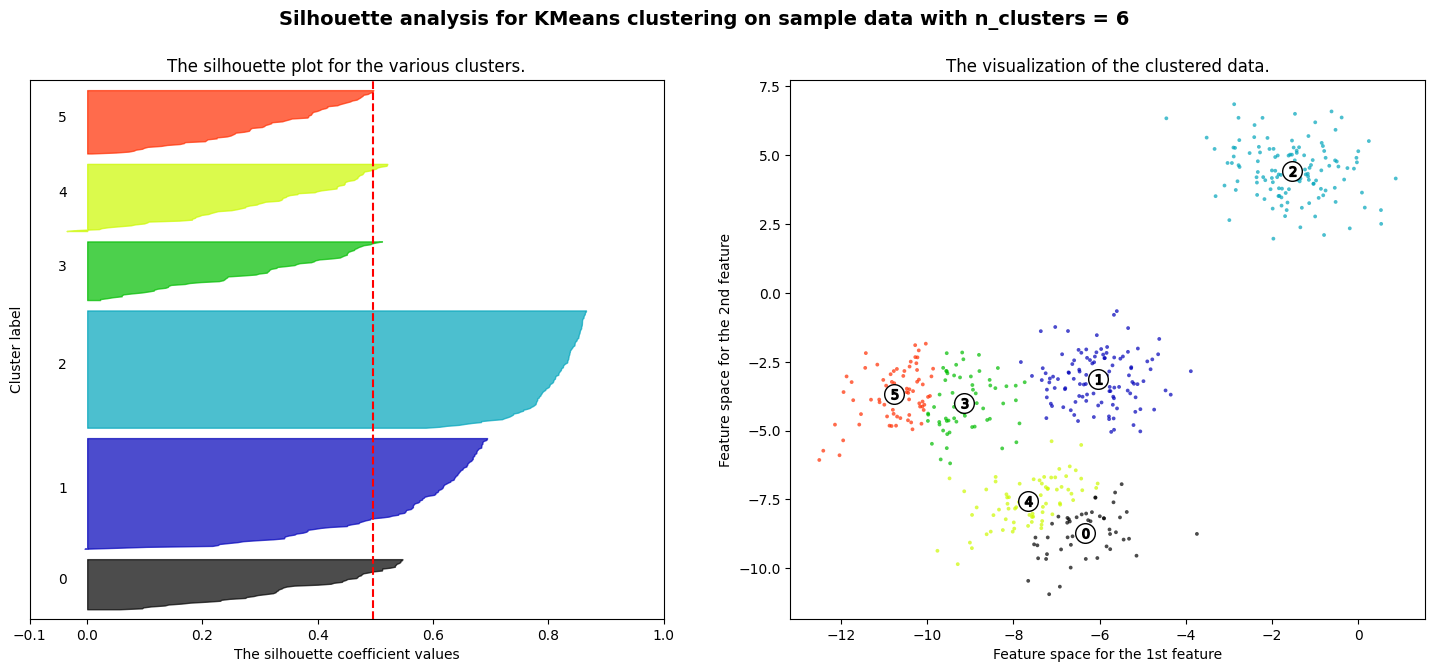

In [ ]:
# https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html#sphx-glr-auto-examples-cluster-plot-kmeans-silhouette-analysis-py

from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

print(__doc__)

# Generating the sample data from make_blobs
# This particular setting has one distinct cluster and 3 clusters placed close
# together.
X, y = make_blobs(n_samples=500,
                  n_features=2,
                  centers=4,
                  cluster_std=1,
                  center_box=(-10.0, 10.0),
                  shuffle=True,
                  random_state=1)  # For reproducibility

range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

# Índice de Validade Externa

Vamos usar o dataset Iris, que já possui informação de rótulo para cada objeto (tipo de flor).

Esse dataset já foi utilizado em outras partes do curso de ciência de dados!

In [ ]:
from sklearn import datasets

iris = datasets.load_iris()
X = iris.data[:, :2]  # vamos usar apenas dois atributos
y = iris.target

In [ ]:
df_iris = pd.DataFrame(X)
df_iris['label']=y
df_iris

,0,1,label
0,5.1,3.5,0
1,4.9,3.0,0
2,4.7,3.2,0
3,4.6,3.1,0
4,5.0,3.6,0
...,...,...,...
145,6.7,3.0,2
146,6.3,2.5,2
147,6.5,3.0,2
148,6.2,3.4,2


<Axes: xlabel='0', ylabel='1'>

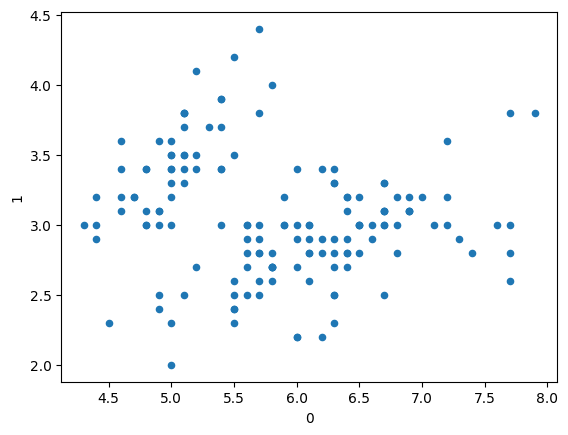

In [ ]:
df_iris.plot(kind='scatter',x=0,y=1)

In [ ]:
kmeans = KMeans(n_clusters=3,n_init=10,init='random',max_iter=300)
kmeans.fit(X) # agrupando

KMeans(init='random', n_clusters=3, n_init=10)

In [ ]:
df_iris['cluster'] = kmeans.labels_
df_iris

,0,1,label,cluster
0,5.1,3.5,0,2
1,4.9,3.0,0,2
2,4.7,3.2,0,2
3,4.6,3.1,0,2
4,5.0,3.6,0,2
...,...,...,...,...
145,6.7,3.0,2,0
146,6.3,2.5,2,1
147,6.5,3.0,2,0
148,6.2,3.4,2,0


In [ ]:
C = kmeans.labels_  # resultado do agrupamento
R = y  # organização de referência

In [ ]:
RAND = adjusted_rand_score(C,R)
print('RAND=',RAND)

RAND= 0.6006861021484542
